# Chess Dataset Visualization

This notebook loads the generated chess datasets and visualizes them using python-chess's SVG rendering capabilities.

We'll visualize:
1. Individual random board positions
2. Game sequences as rows of board states
3. Encoding statistics and analysis

In [1]:
import sys
sys.path.append('..')

import torch
import chess
import chess.svg
from pathlib import Path
from IPython.display import display, SVG, HTML
import numpy as np

## Load Datasets

Load the previously generated datasets from the scratch directory:

In [2]:
SCRATCH_DIR = Path('scratch')

print("Loading datasets...\n")

# Load board state datasets
train_board_dataset = torch.load(SCRATCH_DIR / 'train_board_dataset.pt')
val_board_dataset = torch.load(SCRATCH_DIR / 'val_board_dataset.pt')
test_board_dataset = torch.load(SCRATCH_DIR / 'test_board_dataset.pt')

# Load sequence datasets
train_seq_dataset = torch.load(SCRATCH_DIR / 'train_seq_dataset.pt')
val_seq_dataset = torch.load(SCRATCH_DIR / 'val_seq_dataset.pt')
test_seq_dataset = torch.load(SCRATCH_DIR / 'test_seq_dataset.pt')

print("Board State Datasets:")
print(f"  Train: {len(train_board_dataset)} positions")
print(f"  Val:   {len(val_board_dataset)} positions")
print(f"  Test:  {len(test_board_dataset)} positions")

print("\nSequence Datasets:")
print(f"  Train: {len(train_seq_dataset)} sequences")
print(f"  Val:   {len(val_seq_dataset)} sequences")
print(f"  Test:  {len(test_seq_dataset)} sequences")

print("\nDatasets loaded successfully!")

Loading datasets...



/var/folders/rb/x1hdwk9138lbks3c2gr1f9gr0000gn/T/ipykernel_19033/77370739.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_board_dataset = torch.load(SCRATCH_DIR / 

Board State Datasets:
  Train: 7000 positions
  Val:   1500 positions
  Test:  1500 positions

Sequence Datasets:
  Train: 700 sequences
  Val:   150 sequences
  Test:  150 sequences

Datasets loaded successfully!


## Visualize Random Board Positions

Display a few random board positions from the training dataset:

In [3]:
def display_board(board, title=""):
    """Display a chess board as SVG with optional title."""
    if title:
        display(HTML(f"<h4>{title}</h4>"))
    
    svg = chess.svg.board(board, size=300)
    display(SVG(svg))
    
    print(f"FEN: {board.fen()}")
    print(f"Turn: {'White' if board.turn == chess.WHITE else 'Black'}")
    print(f"Legal moves: {len(list(board.legal_moves))}")
    print(f"Game over: {board.is_game_over()}")
    if board.is_game_over():
        result = board.result()
        print(f"Result: {result}")
    print("-" * 60)

Displaying 3 random board positions:



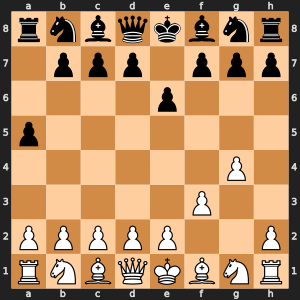

FEN: rnbqkbnr/1ppp1ppp/4p3/p7/6P1/5P2/PPPPP2P/RNBQKBNR w KQkq - 0 3
Turn: White
Legal moves: 20
Game over: False
------------------------------------------------------------



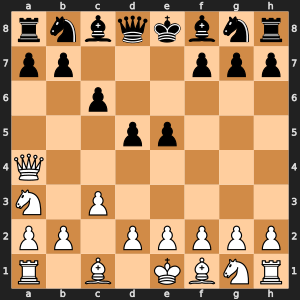

FEN: rnbqkbnr/pp3ppp/2p5/3pp3/Q7/N1P5/PP1PPPPP/R1B1KBNR w KQkq - 0 4
Turn: White
Legal moves: 36
Game over: False
------------------------------------------------------------



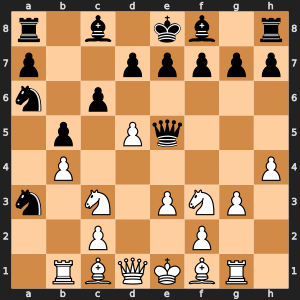

FEN: r1b1kb1r/p2ppppp/n1p5/1p1Pq3/1P5P/n1N1PNP1/2P2P2/1RBQKBR1 b kq - 0 11
Turn: Black
Legal moves: 36
Game over: False
------------------------------------------------------------



In [4]:
# Display 3 random positions from the training set
num_samples = 3
indices = np.random.choice(len(train_board_dataset), num_samples, replace=False)

print(f"Displaying {num_samples} random board positions:\n")

for i, idx in enumerate(indices):
    board = train_board_dataset.boards[idx]
    display_board(board, title=f"Random Position {i+1} (Index: {idx})")
    print()

## Visualize Game Sequences

Display game sequences as rows of board states to see how games progress:

In [5]:
def display_game_sequence(boards, max_boards=8, board_size=200, title=""):
    """
    Display a sequence of chess boards as a horizontal row.
    
    Args:
        boards: List of chess.Board objects
        max_boards: Maximum number of boards to display
        board_size: Size of each board in pixels
        title: Optional title for the sequence
    """
    if title:
        display(HTML(f"<h3>{title}</h3>"))
    
    # Limit the number of boards displayed
    boards_to_show = boards[:max_boards]
    
    # Create SVGs for each board
    svgs = []
    for i, board in enumerate(boards_to_show):
        svg = chess.svg.board(board, size=board_size)
        # Add move number label
        move_num = i // 2 + 1
        player = "White" if board.turn == chess.BLACK else "Black"  # Previous player
        label = f"<div style='text-align: center; font-size: 12px; margin-bottom: 5px;'>"
        label += f"Move {i}: {player}</div>"
        svgs.append(label + svg)
    
    # Create horizontal layout using HTML
    html = "<div style='display: flex; flex-wrap: wrap; gap: 10px;'>"
    for svg in svgs:
        html += f"<div style='flex-shrink: 0;'>{svg}</div>"
    html += "</div>"
    
    display(HTML(html))
    
    print(f"\nSequence info:")
    print(f"  Total moves in sequence: {len(boards)}")
    print(f"  Displaying first {len(boards_to_show)} positions")
    print(f"  Final position game over: {boards[-1].is_game_over()}")
    if boards[-1].is_game_over():
        print(f"  Result: {boards[-1].result()}")
    print("-" * 80)

### Display Several Game Sequences

Show the first few moves of multiple games:

In [6]:
# Display 3 game sequences
num_games = 3
moves_to_show = 8  # Show first 8 positions (including starting position)

print(f"Displaying {num_games} game sequences:\n")

for i in range(num_games):
    boards = train_seq_dataset.sequences[i]
    display_game_sequence(
        boards, 
        max_boards=moves_to_show,
        board_size=180,
        title=f"Game Sequence {i+1}"
    )
    print("\n")

Displaying 3 game sequences:




Sequence info:
  Total moves in sequence: 61
  Displaying first 8 positions
  Final position game over: False
--------------------------------------------------------------------------------





Sequence info:
  Total moves in sequence: 61
  Displaying first 8 positions
  Final position game over: False
--------------------------------------------------------------------------------





Sequence info:
  Total moves in sequence: 61
  Displaying first 8 positions
  Final position game over: False
--------------------------------------------------------------------------------




## Detailed View: Single Game Progression

Show a complete game with more details:

In [7]:
# Pick a random game sequence
game_idx = np.random.randint(len(train_seq_dataset))
game_boards = train_seq_dataset.sequences[game_idx]

print(f"Detailed view of game sequence {game_idx}")
print(f"Total positions: {len(game_boards)}\n")

# Show every 5th position to see progression
positions_to_show = game_boards[::5]  # Every 5th position

display_game_sequence(
    positions_to_show,
    max_boards=12,
    board_size=200,
    title=f"Game {game_idx} - Every 5th Position"
)

Detailed view of game sequence 246
Total positions: 61




Sequence info:
  Total moves in sequence: 13
  Displaying first 12 positions
  Final position game over: False
--------------------------------------------------------------------------------


## Compare Starting Position vs Random Position

Show the encoding difference between a starting position and a random position:

Comparing starting position vs random position:



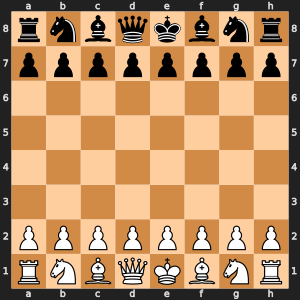

FEN: rnbqkbnr/pppppppp/8/8/8/8/PPPPPPPP/RNBQKBNR w KQkq - 0 1
Turn: White
Legal moves: 20
Game over: False
------------------------------------------------------------



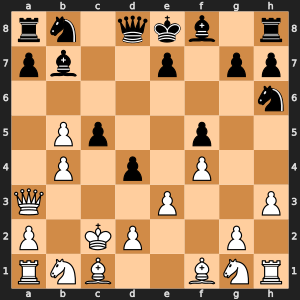

FEN: rn1qkb1r/pb2p1pp/7n/1Pp2p2/1P1p1P2/Q3P2P/P1KP2P1/RNB2BNR w kq - 0 12
Turn: White
Legal moves: 28
Game over: False
------------------------------------------------------------


In [8]:
# Starting position
start_board = chess.Board()

# Random position from dataset
random_idx = np.random.randint(len(train_board_dataset))
random_board = train_board_dataset.boards[random_idx]

print("Comparing starting position vs random position:\n")

display_board(start_board, title="Starting Position")
print()
display_board(random_board, title=f"Random Position (Index: {random_idx})")

## Encoding Visualization

Visualize the tensor encoding for a board position:

Encoding visualization for position 5479:

Board position:


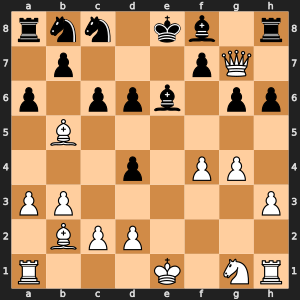

FEN: rnn1kb1r/1p3pQ1/p1ppb1pp/1B6/3p1PP1/PP5P/1BPP4/R3K1NR w KQkq - 4 14
Turn: White
Legal moves: 40
Game over: False
------------------------------------------------------------

Encoding visualization (8x8x12 tensor):
Encoding shape: torch.Size([8, 8, 12])
Total pieces encoded: 29


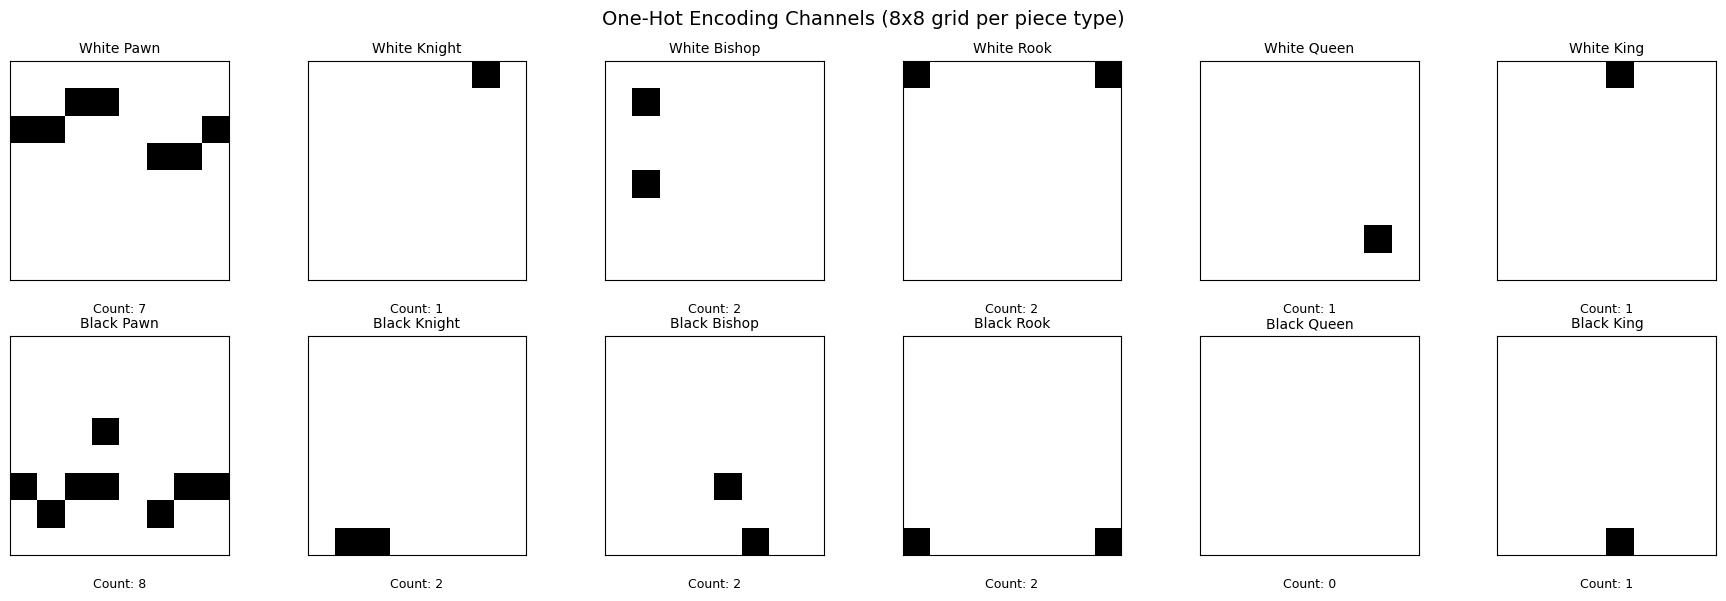

In [9]:
import matplotlib.pyplot as plt

def visualize_encoding(board, encoding):
    """
    Visualize the one-hot encoding of a chess board.
    """
    print("Board position:")
    display_board(board)
    
    print("\nEncoding visualization (8x8x12 tensor):")
    print(f"Encoding shape: {encoding.shape}")
    print(f"Total pieces encoded: {encoding.sum().item():.0f}")
    
    # Piece type names
    piece_names = ['Pawn', 'Knight', 'Bishop', 'Rook', 'Queen', 'King']
    
    # Create subplots for each channel
    fig, axes = plt.subplots(2, 6, figsize=(18, 6))
    fig.suptitle('One-Hot Encoding Channels (8x8 grid per piece type)', fontsize=14)
    
    for color_idx, color_name in enumerate(['White', 'Black']):
        for piece_idx, piece_name in enumerate(piece_names):
            channel = color_idx * 6 + piece_idx
            ax = axes[color_idx, piece_idx]
            
            # Display the channel as a heatmap
            im = ax.imshow(encoding[:, :, channel].numpy(), cmap='Greys', vmin=0, vmax=1)
            ax.set_title(f'{color_name} {piece_name}', fontsize=10)
            ax.set_xticks([])
            ax.set_yticks([])
            
            # Add count of pieces
            count = encoding[:, :, channel].sum().item()
            ax.text(0.5, -0.15, f'Count: {count:.0f}', 
                   ha='center', transform=ax.transAxes, fontsize=9)
    
    plt.tight_layout()
    plt.show()

# Visualize a random position's encoding
sample_idx = np.random.randint(len(train_board_dataset))
sample_board = train_board_dataset.boards[sample_idx]
sample_encoding = train_board_dataset[sample_idx]

print(f"Encoding visualization for position {sample_idx}:\n")
visualize_encoding(sample_board, sample_encoding)

## Dataset Statistics

Analyze piece distributions across the datasets:

Analyzing training board dataset...



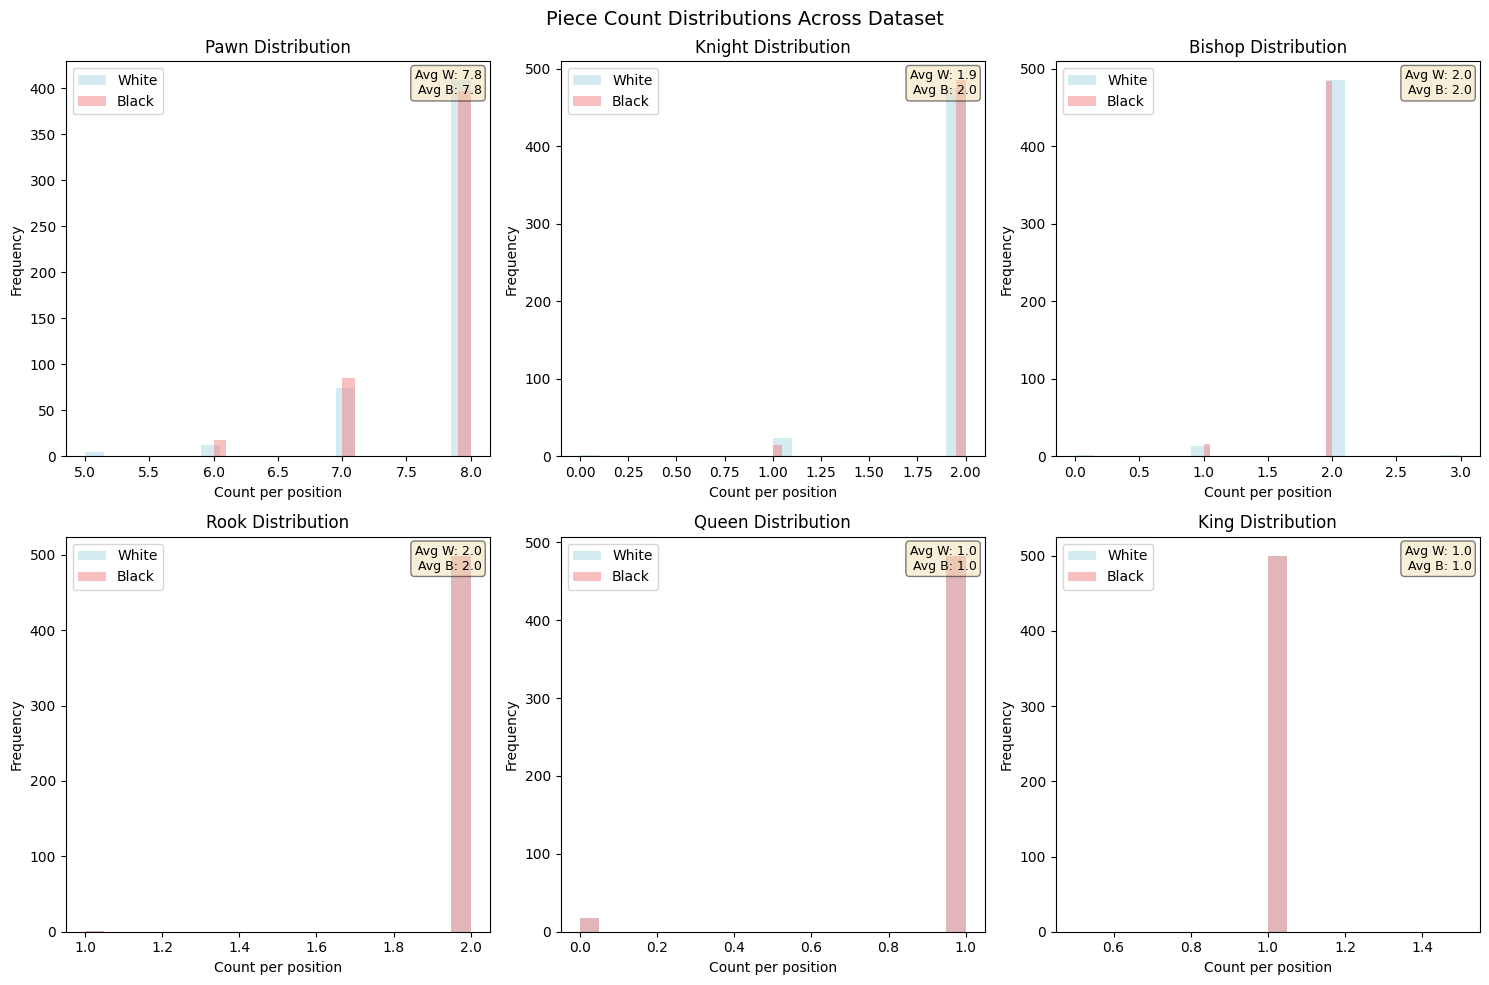


Overall Statistics (from 500 positions):
  Average total pieces: 31.32
  Min total pieces: 25
  Max total pieces: 32
  Std dev: 1.07


In [10]:
def analyze_piece_distribution(dataset, num_samples=500):
    """
    Analyze piece count distribution in a dataset.
    """
    piece_names = ['Pawn', 'Knight', 'Bishop', 'Rook', 'Queen', 'King']
    
    white_pieces = {name: [] for name in piece_names}
    black_pieces = {name: [] for name in piece_names}
    total_pieces = []
    
    sample_size = min(num_samples, len(dataset))
    
    for i in range(sample_size):
        encoding = dataset[i]
        
        # Count pieces for each type
        for piece_idx, piece_name in enumerate(piece_names):
            white_count = encoding[:, :, piece_idx].sum().item()
            black_count = encoding[:, :, piece_idx + 6].sum().item()
            
            white_pieces[piece_name].append(white_count)
            black_pieces[piece_name].append(black_count)
        
        total_pieces.append(encoding.sum().item())
    
    # Plot distributions
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Piece Count Distributions Across Dataset', fontsize=14)
    
    for idx, piece_name in enumerate(piece_names):
        ax = axes[idx // 3, idx % 3]
        
        white_counts = white_pieces[piece_name]
        black_counts = black_pieces[piece_name]
        
        ax.hist(white_counts, alpha=0.5, label='White', bins=20, color='lightblue')
        ax.hist(black_counts, alpha=0.5, label='Black', bins=20, color='lightcoral')
        ax.set_title(f'{piece_name} Distribution')
        ax.set_xlabel('Count per position')
        ax.set_ylabel('Frequency')
        ax.legend()
        
        # Add statistics
        white_avg = np.mean(white_counts)
        black_avg = np.mean(black_counts)
        ax.text(0.98, 0.98, f'Avg W: {white_avg:.1f}\nAvg B: {black_avg:.1f}',
               transform=ax.transAxes, ha='right', va='top',
               bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
               fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Print overall statistics
    print(f"\nOverall Statistics (from {sample_size} positions):")
    print(f"  Average total pieces: {np.mean(total_pieces):.2f}")
    print(f"  Min total pieces: {np.min(total_pieces):.0f}")
    print(f"  Max total pieces: {np.max(total_pieces):.0f}")
    print(f"  Std dev: {np.std(total_pieces):.2f}")

print("Analyzing training board dataset...\n")
analyze_piece_distribution(train_board_dataset, num_samples=500)

## Sequence Length Distribution

Analyze how long game sequences are in the dataset:

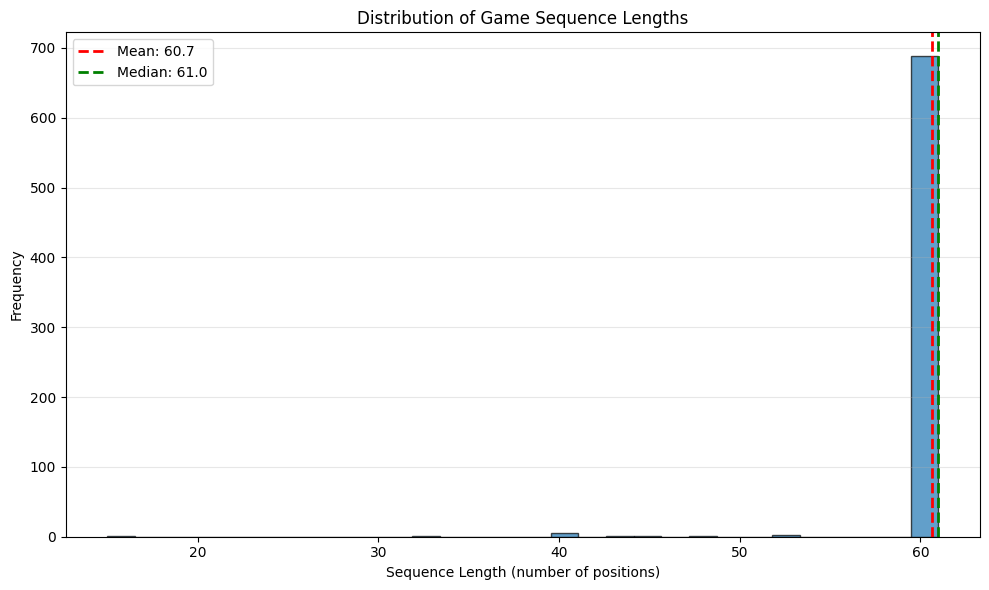


Sequence Length Statistics:
  Mean: 60.66
  Median: 61.00
  Min: 15
  Max: 61
  Std dev: 2.88


In [11]:
# Get sequence lengths
seq_lengths = [len(seq) for seq in train_seq_dataset.sequences]

plt.figure(figsize=(10, 6))
plt.hist(seq_lengths, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Sequence Length (number of positions)')
plt.ylabel('Frequency')
plt.title('Distribution of Game Sequence Lengths')
plt.axvline(np.mean(seq_lengths), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(seq_lengths):.1f}')
plt.axvline(np.median(seq_lengths), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(seq_lengths):.1f}')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nSequence Length Statistics:")
print(f"  Mean: {np.mean(seq_lengths):.2f}")
print(f"  Median: {np.median(seq_lengths):.2f}")
print(f"  Min: {np.min(seq_lengths)}")
print(f"  Max: {np.max(seq_lengths)}")
print(f"  Std dev: {np.std(seq_lengths):.2f}")

## Interactive: Display Specific Game

Enter a game index to visualize:

In [12]:
# Change this index to view different games
GAME_INDEX = 0
POSITIONS_TO_SHOW = 10

if GAME_INDEX < len(train_seq_dataset):
    game = train_seq_dataset.sequences[GAME_INDEX]
    display_game_sequence(
        game,
        max_boards=POSITIONS_TO_SHOW,
        board_size=200,
        title=f"Game {GAME_INDEX} - First {POSITIONS_TO_SHOW} Positions"
    )
else:
    print(f"Game index {GAME_INDEX} out of range. Max index: {len(train_seq_dataset) - 1}")


Sequence info:
  Total moves in sequence: 61
  Displaying first 10 positions
  Final position game over: False
--------------------------------------------------------------------------------


## Summary

This notebook provides comprehensive visualization of the chess datasets:

- **Board Positions**: Individual chess positions rendered as SVG
- **Game Sequences**: Rows of boards showing game progression
- **Encoding Analysis**: Visualization of the one-hot tensor encoding
- **Statistical Analysis**: Piece distributions and sequence lengths

The datasets are ready for training your equilibrium propagation chess model!